In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
  return series[..., np.newaxis].astype(np.float32)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [6]:
model = keras.models.Sequential([
  keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

model.compile(optimizer="adam", loss="mse")

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1499 - val_loss: 0.1367
Epoch 2/20
219/219 [==============================] - 1s 7ms/step - loss: 0.1163 - val_loss: 0.0971
Epoch 3/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0799 - val_loss: 0.0681
Epoch 4/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0590 - val_loss: 0.0525
Epoch 5/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0471 - val_loss: 0.0431
Epoch 6/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0394 - val_loss: 0.0366
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0339 - val_loss: 0.0319
Epoch 8/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0299 - val_loss: 0.0284
Epoch 9/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0267 - val_loss: 0.0255
Epoch 10/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0241 - val_loss: 0.0232

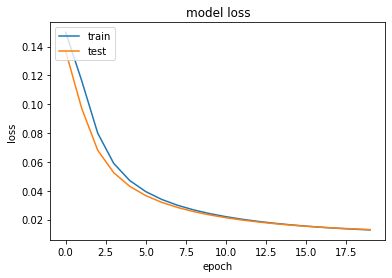

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()